In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


import warnings
warnings.filterwarnings('ignore')


# 读取数据

In [4]:
train = pd.read_csv('train.csv') 

In [5]:
train.columns

Index(['id', 'XINGBIE', 'CSNY', 'HYZK', 'ZHIYE', 'ZHICHEN', 'ZHIWU', 'XUELI',
       'DWJJLX', 'DWSSHY', 'GRJCJS', 'GRZHZT', 'GRZHYE', 'GRZHSNJZYE',
       'GRZHDNGJYE', 'GRYJCE', 'DWYJCE', 'DKFFE', 'DKYE', 'DKLL', 'label'],
      dtype='object')

In [6]:
'''
'id':主键,
'XINGBIE':性别,
'CSNY':出生年月,
'HYZK':	婚姻状况,
'ZHIYE':职业,
'ZHICHEN':职称,
'ZHIWU':职务,
'XUELI':学历,
'DWJJLX':单位经济类型,
'DWSSHY':单位所属行业,
'GRJCJS':个人缴存基数,
'GRZHZT':个人账户状态,
'GRZHYE':个人账户余额,
'GRZHSNJZYE':个人账户上年结转余额,
'GRZHDNGJYE':个人账户当年归集余额,
'GRYJCE':个人月缴存额,
'DWYJCE':单位月缴存额,
'DKFFE':贷款发放额,
'DKYE':	贷款余额,
'DKLL':贷款利率,
'label':是否逾期 (0代表没逾期1代表逾期)
'''

"\n'id':主键,\n'XINGBIE':性别,\n'CSNY':出生年月,\n'HYZK':\t婚姻状况,\n'ZHIYE':职业,\n'ZHICHEN':职称,\n'ZHIWU':职务,\n'XUELI':学历,\n'DWJJLX':单位经济类型,\n'DWSSHY':单位所属行业,\n'GRJCJS':个人缴存基数,\n'GRZHZT':个人账户状态,\n'GRZHYE':个人账户余额,\n'GRZHSNJZYE':个人账户上年结转余额,\n'GRZHDNGJYE':个人账户当年归集余额,\n'GRYJCE':个人月缴存额,\n'DWYJCE':单位月缴存额,\n'DKFFE':贷款发放额,\n'DKYE':\t贷款余额,\n'DKLL':贷款利率,\n'label':是否逾期 (0代表没逾期1代表逾期)\n"

In [7]:
train.head()

,id,XINGBIE,CSNY,HYZK,ZHIYE,ZHICHEN,ZHIWU,XUELI,DWJJLX,DWSSHY,...,GRZHZT,GRZHYE,GRZHSNJZYE,GRZHDNGJYE,GRYJCE,DWYJCE,DKFFE,DKYE,DKLL,label
0,train_0,1,1038672000,90,90,999,0,99,150,12,...,1,3223.515,801.310,837.000,312.00,312.00,175237,154112.935,2.708,0
1,train_1,2,504892800,90,90,999,0,99,110,0,...,1,18055.195,53213.220,1065.200,795.84,795.84,300237,298252.945,2.979,0
2,train_2,1,736185600,90,90,999,0,99,150,9,...,1,27426.600,13963.140,7230.020,1444.20,1444.20,150237,147339.130,2.708,0
3,train_3,1,428515200,90,90,999,0,99,150,7,...,1,111871.130,99701.265,2271.295,1417.14,1417.14,350237,300653.780,2.708,0
4,train_4,2,544204800,90,90,999,0,99,900,14,...,1,237.000,11028.875,35.780,325.50,325.50,150237,145185.010,2.708,0


In [8]:
#构建训练集
X = train.loc[:,'XINGBIE':'DKLL']
Y = train['label']

In [9]:
X

,XINGBIE,CSNY,HYZK,ZHIYE,ZHICHEN,ZHIWU,XUELI,DWJJLX,DWSSHY,GRJCJS,GRZHZT,GRZHYE,GRZHSNJZYE,GRZHDNGJYE,GRYJCE,DWYJCE,DKFFE,DKYE,DKLL
0,1,1038672000,90,90,999,0,99,150,12,1737.0,1,3223.515,801.310,837.000,312.00,312.00,175237,154112.935,2.708
1,2,504892800,90,90,999,0,99,110,0,4894.0,1,18055.195,53213.220,1065.200,795.84,795.84,300237,298252.945,2.979
2,1,736185600,90,90,999,0,99,150,9,10297.0,1,27426.600,13963.140,7230.020,1444.20,1444.20,150237,147339.130,2.708
3,1,428515200,90,90,999,0,99,150,7,10071.5,1,111871.130,99701.265,2271.295,1417.14,1417.14,350237,300653.780,2.708
4,2,544204800,90,90,999,0,99,900,14,2007.0,1,237.000,11028.875,35.780,325.50,325.50,150237,145185.010,2.708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1,573148800,90,90,999,0,99,110,16,3185.0,1,82865.575,65304.370,4026.600,590.76,590.76,150237,117816.680,2.708
39996,2,57772800,90,90,999,0,99,110,14,1660.5,1,32811.585,27065.150,1603.560,407.82,407.82,300237,267615.065,2.979
39997,2,673023600,90,90,999,0,99,143,9,3923.0,1,8875.695,1309.890,3185.800,605.60,605.60,175237,237.000,2.708
39998,1,536428800,90,90,999,0,99,150,6,3527.0,1,2079.400,252.875,1614.490,467.30,467.30,125237,113068.900,2.708


# 构建决策树

In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(
     max_depth=3,
     min_samples_leaf=50
     )
clf = clf.fit(X, Y)

# 决策树可视化

In [11]:
''' 
决策树可视化的方案比较多，都写出来给对比看看，推荐第二种和第三种。
对决策树进行可视化，是非常有必要的，能够帮助我们自己充分理解决策树的生成过程，
如果是风控，也有利于咱们给业务部门解释数据和结果。
'''

' \n决策树可视化的方案比较多，都写出来给对比看看，推荐第二种和第三种。\n对决策树进行可视化，是非常有必要的，能够帮助我们自己充分理解决策树的生成过程，\n如果是风控，也有利于咱们给业务部门解释数据和结果。\n'

## plot_tree(不推荐)

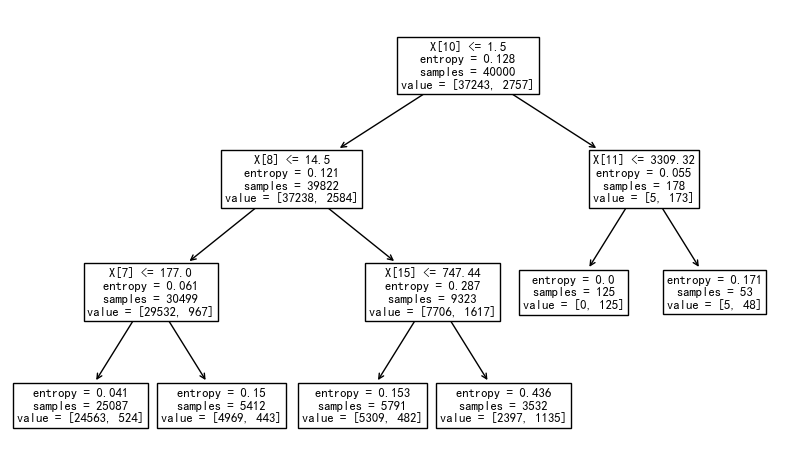

In [12]:
plt.figure(figsize=(10,6),dpi=100)
tree.plot_tree(clf)
plt.show()

## graphviz对决策树进行可视化

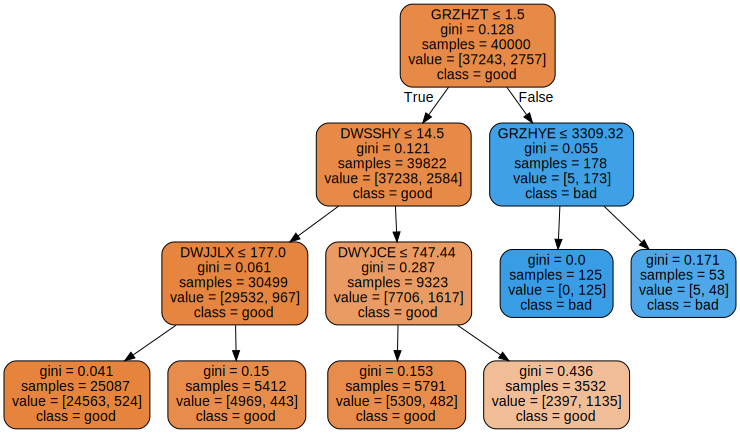

In [13]:

import graphviz 
dot_data = tree.export_graphviz(
                     clf, 
                     out_file=None, 
                     feature_names=X.columns,  
                     class_names=['good','bad'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [14]:
''' 
生成的决策树解释
1:samples:节点中观察的数量,比如根节点40000,表示数据集总共有4万个样本
2:有多少种类别:整棵树的叶子就有多少种颜色,比如我们这里有2个类别,颜色对应是黄、绿、Gini指数越小,该节点颜色越深,也就是纯度越高。
3:value表示当前节点2种类别的样本有多少,比如下面第一棵树的根节点,value = [37243,2757],表示有37243个好样本,2757坏样本
4:class表示当前那个类别的样本最多,比如下面最右边的一棵树的根节点,class = bad,可以看到当前节点它的坏样本数是最多的。
5:gini节点的基尼不纯度。当沿着树向下移动时,平均加权的基尼不纯度必须降低。

'''

' \n生成的决策树解释\n1:samples:节点中观察的数量,比如根节点40000,表示数据集总共有4万个样本\n2:有多少种类别:整棵树的叶子就有多少种颜色,比如我们这里有2个类别,颜色对应是黄、绿、Gini指数越小,该节点颜色越深,也就是纯度越高。\n3:value表示当前节点2种类别的样本有多少,比如下面第一棵树的根节点,value = [37243,2757],表示有37243个好样本,2757坏样本\n4:class表示当前那个类别的样本最多,比如下面最右边的一棵树的根节点,class = bad,可以看到当前节点它的坏样本数是最多的。\n5:gini节点的基尼不纯度。当沿着树向下移动时,平均加权的基尼不纯度必须降低。\n\n'

## tree.export_graphviz

In [15]:
from dtreeviz.trees import dtreeviz
testX = X.iloc[77,:]
viz = dtreeviz(clf,X,Y,
                feature_names=np.array(X.columns),
                class_names={0:'good',1:'bad'},
                X = testX)             

viz.view()  # 会在web 端显示

In [16]:
# 继续将树的深度增加至5层

In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(
     max_depth=5,
     min_samples_leaf=50
     )
clf = clf.fit(X, Y)

from dtreeviz.trees import dtreeviz
testX = X.iloc[77,:]
viz = dtreeviz(clf,X,Y,
                feature_names=np.array(X.columns),
                class_names={0:'good',1:'bad'},
                X = testX)             
viz.view()

In [18]:
# 也可以横向展示

viz = dtreeviz(clf,X,Y,
               orientation ='LR',  # left-right orientation
               feature_names=np.array(X.columns),
               class_names={0:'good',1:'bad'},
               X = testX)       
viz.view()

In [19]:
# 如果只想可视化预测路径，则需要设置参数 show_just_path=True
viz = dtreeviz(clf,X,Y,
               feature_names=np.array(X.columns),
               class_names={0:'good',1:'bad'},
               orientation ='LR',  # left-right orientation
               show_just_path=True,
               X = testX) 
viz.view()

# 决策规则提取

## 1、决策树的生成的结构探索

In [20]:

from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
clf.classes_
[x for x in dir(clf) if not x.startswith('_')]

['apply',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_classes_',
 'n_features_',
 'n_outputs_',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'presort',
 'random_state',
 'score',
 'set_params',
 'splitter',
 'tree_']

In [21]:
''' 

大致浏览上述结果，属性主要是决策树初始化时的参数，例如ccp_alpha：剪枝系数，class_weight：类的权重，criterion：分裂准则等；还有就是决策树实现的主要函数，例如fit：模型训练，predict：模型预测等等。
本文的重点是探究决策树中是如何保存训练后的"那颗树"，所以我们进一步用鸢尾花数据集对决策树进行训练一下，而后再次调用dir函数，看看增加了哪些属性和接口：
本文的重点是探究决策树中是如何保存训练后的"那颗树"，所以我们进一步用鸢尾花数据集对决策树进行训练一下，而后再次调用dir函数，看看增加了哪些属性和接口：

'''

' \n\n大致浏览上述结果，属性主要是决策树初始化时的参数，例如ccp_alpha：剪枝系数，class_weight：类的权重，criterion：分裂准则等；还有就是决策树实现的主要函数，例如fit：模型训练，predict：模型预测等等。\n本文的重点是探究决策树中是如何保存训练后的"那颗树"，所以我们进一步用鸢尾花数据集对决策树进行训练一下，而后再次调用dir函数，看看增加了哪些属性和接口：\n本文的重点是探究决策树中是如何保存训练后的"那颗树"，所以我们进一步用鸢尾花数据集对决策树进行训练一下，而后再次调用dir函数，看看增加了哪些属性和接口：\n\n'

In [22]:
X,y = load_iris(return_X_y=True)
dt =  tree.DecisionTreeClassifier().fit(X,y)

set(dir(dt)).difference(dir(tree.DecisionTreeClassifier()))

{'classes_',
 'max_features_',
 'n_classes_',
 'n_features_',
 'n_outputs_',
 'tree_'}

In [23]:
dt.tree_

In [24]:
import sklearn
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

In [25]:
[x for x in dir(clf.tree_) if not x.startswith('_')]

['apply',
 'capacity',
 'children_left',
 'children_right',
 'compute_feature_importances',
 'compute_partial_dependence',
 'decision_path',
 'feature',
 'impurity',
 'max_depth',
 'max_n_classes',
 'n_classes',
 'n_features',
 'n_leaves',
 'n_node_samples',
 'n_outputs',
 'node_count',
 'predict',
 'threshold',
 'value',
 'weighted_n_node_samples']

In [26]:
'''
为了进一步理解各属性中的数据是如何存储的，我们仍以鸢尾花数据集为例，
训练一个max_depth=2的决策树（根节点对应depth=0）,并查看如下取值：

'''

'\n为了进一步理解各属性中的数据是如何存储的，我们仍以鸢尾花数据集为例，\n训练一个max_depth=2的决策树（根节点对应depth=0）,并查看如下取值：\n\n'

In [27]:
from sklearn import tree
X,y = load_iris(return_X_y=True)
dt =  tree.DecisionTreeClassifier(max_depth=2).fit(X,y)
set(dir(dt)).difference(dir(tree.DecisionTreeClassifier()))

{'classes_',
 'max_features_',
 'n_classes_',
 'n_features_',
 'n_outputs_',
 'tree_'}

In [28]:
from sklearn import tree
X,y = load_iris(return_X_y=True)
dt =  tree.DecisionTreeClassifier(max_depth=2).fit(X,y)
dt.tree_

In [29]:
import sklearn

help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

In [32]:
from sklearn import tree
X,y = load_iris(return_X_y=True)
dt =  tree.DecisionTreeClassifier(max_depth=2).fit(X,y)
tree = dt.tree_

In [34]:
print('tree.node_count',tree.node_count)
print('tree.n_leaves',tree.n_leaves)

print('tree.children_left',tree.children_left)
print('tree.children_right',tree.children_right)

print('tree.feature',tree.feature)
print('tree.threshold',tree.threshold)
print('tree.value',tree.value)

tree.node_count 5
tree.n_leaves 3
tree.children_left [ 1 -1  3 -1 -1]
tree.children_right [ 2 -1  4 -1 -1]
tree.feature [ 3 -2  3 -2 -2]
tree.threshold [ 0.80000001 -2.          1.75       -2.         -2.        ]
tree.value [[[50. 50. 50.]]

 [[50.  0.  0.]]

 [[ 0. 50. 50.]]

 [[ 0. 49.  5.]]

 [[ 0.  1. 45.]]]


In [35]:
X,y = load_iris(return_X_y=True)
y[X[:,3]<=0.8]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## 老方法提取决策树规则

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          40000 non-null  object 
 1   XINGBIE     40000 non-null  int64  
 2   CSNY        40000 non-null  int64  
 3   HYZK        40000 non-null  int64  
 4   ZHIYE       40000 non-null  int64  
 5   ZHICHEN     40000 non-null  int64  
 6   ZHIWU       40000 non-null  int64  
 7   XUELI       40000 non-null  int64  
 8   DWJJLX      40000 non-null  int64  
 9   DWSSHY      40000 non-null  int64  
 10  GRJCJS      40000 non-null  float64
 11  GRZHZT      40000 non-null  int64  
 12  GRZHYE      40000 non-null  float64
 13  GRZHSNJZYE  40000 non-null  float64
 14  GRZHDNGJYE  40000 non-null  float64
 15  GRYJCE      40000 non-null  float64
 16  DWYJCE      40000 non-null  float64
 17  DKFFE       40000 non-null  int64  
 18  DKYE        40000 non-null  float64
 19  DKLL        40000 non-nul

In [52]:
X = train.loc[:,'XINGBIE':'DKLL']
Y = train['label']

In [53]:
# 训练一个决策树，这里限制了最大深度和最小样本树

from sklearn import tree
clf = tree.DecisionTreeClassifier(
     max_depth=3,
     min_samples_leaf=50
     )
clf = clf.fit(X, Y)

In [54]:
# 决策树规则提取-老方法

from sklearn.tree import _tree
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

tree_to_code(clf,X.columns)


def tree(XINGBIE, CSNY, HYZK, ZHIYE, ZHICHEN, ZHIWU, XUELI, DWJJLX, DWSSHY, GRJCJS, GRZHZT, GRZHYE, GRZHSNJZYE, GRZHDNGJYE, GRYJCE, DWYJCE, DKFFE, DKYE, DKLL):
  if GRZHZT <= 1.5:
    if DWSSHY <= 14.5:
      if DWJJLX <= 177.0:
        return [[24563.   524.]]
      else:  # if DWJJLX > 177.0
        return [[4969.  443.]]
    else:  # if DWSSHY > 14.5
      if GRYJCE <= 747.4400024414062:
        return [[5309.  482.]]
      else:  # if GRYJCE > 747.4400024414062
        return [[2397. 1135.]]
  else:  # if GRZHZT > 1.5
    if GRZHYE <= 3309.320068359375:
      return [[  0. 125.]]
    else:  # if GRZHYE > 3309.320068359375
      return [[ 5. 48.]]


## 新方法提取决策树规则

In [46]:
from sklearn.tree import _tree

def Get_Rules(clf,X):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    value = clf.tree_.value

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves  = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]

    while len(stack) > 0:

        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        is_split_node = children_left[node_id] != children_right[node_id]

        if is_split_node:
            stack.append((children_left[node_id],  depth+1))
            stack.append((children_right[node_id], depth+1))
        else:
            is_leaves[node_id] = True  
    feature_name = [
            X.columns[i] if i != _tree.TREE_UNDEFINED else "undefined!"
            for i in clf.tree_.feature]

    ways  = []
    depth = []
    feat = []
    nodes = []
    rules = []
    for i in range(n_nodes):   
        if  is_leaves[i]: 
            while depth[-1] >= node_depth[i]:
                depth.pop()
                ways.pop()    
                feat.pop()
                nodes.pop()
            if children_left[i-1]==i:#当前节点是上一个节点的左节点，则是小于
                a='{f}<={th}'.format(f=feat[-1],th=round(threshold[nodes[-1]],4))
                ways[-1]=a              
                last =' & '.join(ways)+':'+str(value[i][0][0])+':'+str(value[i][0][1])
                rules.append(last)
            else:
                a='{f}>{th}'.format(f=feat[-1],th=round(threshold[nodes[-1]],4))
                ways[-1]=a
                last = ' & '.join(ways)+':'+str(value[i][0][0])+':'+str(value[i][0][1])
                rules.append(last)

        else: #不是叶子节点 入栈
            if i==0:
                ways.append(round(threshold[i],4))
                depth.append(node_depth[i])
                feat.append(feature_name[i])
                nodes.append(i)             
            else: 
                while depth[-1] >= node_depth[i]:
                    depth.pop()
                    ways.pop()
                    feat.pop()
                    nodes.pop()
                if i==children_left[nodes[-1]]:
                    w='{f}<={th}'.format(f=feat[-1],th=round(threshold[nodes[-1]],4))
                else:
                    w='{f}>{th}'.format(f=feat[-1],th=round(threshold[nodes[-1]],4))              
                ways[-1] = w  
                ways.append(round(threshold[i],4))
                depth.append(node_depth[i]) 
                feat.append(feature_name[i])
                nodes.append(i)
    return rules

In [47]:

import pandas as pd
import numpy  as np
pd.set_option('display.max_columns', None)#显示所有的列
train = pd.read_csv('train.csv').fillna(-1)

X = train.loc[:,'XINGBIE':'DKLL']
Y = train['label']

from sklearn import tree
#训练一个决策树，对规则进行提取
clf = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=50)
clf = clf.fit(X, Y)
Rules = Get_Rules(clf,X)

In [49]:
Rules[0:5]

['GRZHZT<=1.5 & DWSSHY<=14.5 & DWJJLX<=177.0 & DWJJLX<=115.0 & DKYE<=111236.2852 & DWSSHY<=4.5 & GRYJCE<=663.54 & DKYE<=67419.1094:45.0:8.0',
 'GRZHZT<=1.5 & DWSSHY<=14.5 & DWJJLX<=177.0 & DWJJLX<=115.0 & DKYE<=111236.2852 & DWSSHY<=4.5 & GRYJCE<=663.54 & DKYE>67419.1094:61.0:3.0',
 'GRZHZT<=1.5 & DWSSHY<=14.5 & DWJJLX<=177.0 & DWJJLX<=115.0 & DKYE<=111236.2852 & DWSSHY<=4.5 & GRYJCE>663.54 & GRZHDNGJYE<=8994.7803 & DKYE<=1825.5625:55.0:2.0',
 'GRZHZT<=1.5 & DWSSHY<=14.5 & DWJJLX<=177.0 & DWJJLX<=115.0 & DKYE<=111236.2852 & DWSSHY<=4.5 & GRYJCE>663.54 & GRZHDNGJYE<=8994.7803 & DKYE>1825.5625:196.0:0.0',
 'GRZHZT<=1.5 & DWSSHY<=14.5 & DWJJLX<=177.0 & DWJJLX<=115.0 & DKYE<=111236.2852 & DWSSHY<=4.5 & GRYJCE>663.54 & GRZHDNGJYE>8994.7803:46.0:4.0']

In [50]:
# 第一条后面的45.0:8.0，指的是样本标签的0:1比例

cond1 = (train['GRZHZT']<=1.5) & (train['DWSSHY']<=14.5) & (train['DWJJLX']<=177.0) & (train['DWJJLX']<=115.0) & (train['DKYE']<=111236.2852) & (train['DWSSHY']<=4.5) & (train['DWYJCE']<=663.54) & (train['DKYE']<=67419.1094)
train[cond1]['label'].value_counts()

0    45
1     8
Name: label, dtype: int64

In [51]:
#提高树的深度再看看，max_depth=15，可以看到规则数从182变成了521条，规模更大
clf = tree.DecisionTreeClassifier(max_depth=15,min_samples_leaf=20)
clf = clf.fit(X, Y)
Rules = Get_Rules(clf,X)

In [52]:
len(Rules)

521

In [53]:
# 遍历所有规则
for i in Rules:
    print(i)

GRZHZT<=1.5 & DWSSHY<=14.5 & DWJJLX<=177.0 & DWJJLX<=115.0 & DKYE<=111236.2852 & DWSSHY<=4.5 & DWYJCE<=663.54 & GRZHSNJZYE<=19428.9082 & DKFFE<=142737.0 & CSNY<=600926400.0:54.0:0.0
GRZHZT<=1.5 & DWSSHY<=14.5 & DWJJLX<=177.0 & DWJJLX<=115.0 & DKYE<=111236.2852 & DWSSHY<=4.5 & DWYJCE<=663.54 & GRZHSNJZYE<=19428.9082 & DKFFE<=142737.0 & CSNY>600926400.0:18.0:2.0
GRZHZT<=1.5 & DWSSHY<=14.5 & DWJJLX<=177.0 & DWJJLX<=115.0 & DKYE<=111236.2852 & DWSSHY<=4.5 & DWYJCE<=663.54 & GRZHSNJZYE<=19428.9082 & DKFFE>142737.0:19.0:4.0
GRZHZT<=1.5 & DWSSHY<=14.5 & DWJJLX<=177.0 & DWJJLX<=115.0 & DKYE<=111236.2852 & DWSSHY<=4.5 & DWYJCE<=663.54 & GRZHSNJZYE>19428.9082:15.0:5.0
GRZHZT<=1.5 & DWSSHY<=14.5 & DWJJLX<=177.0 & DWJJLX<=115.0 & DKYE<=111236.2852 & DWSSHY<=4.5 & DWYJCE>663.54 & GRZHYE<=73608.0156 & DKYE<=1825.5625 & GRZHSNJZYE<=9524.7949:21.0:2.0
GRZHZT<=1.5 & DWSSHY<=14.5 & DWJJLX<=177.0 & DWJJLX<=115.0 & DKYE<=111236.2852 & DWSSHY<=4.5 & DWYJCE>663.54 & GRZHYE<=73608.0156 & DKYE<=1825.5625 & GR

In [78]:

#训练一个决策树，对规则进行提取
clf = tree.DecisionTreeClassifier(max_depth=2,
min_samples_leaf=50)
clf = clf.fit(X, Y)
Rules = Get_Rules(clf,X)

In [79]:
# 遍历所有规则
for i in Rules:
    print(i)

GRZHZT<=1.5 & DWSSHY<=14.5:29532.0:967.0
GRZHZT<=1.5 & DWSSHY>14.5:7706.0:1617.0
GRZHZT>1.5 & GRZHYE<=3309.3201:0.0:125.0
GRZHZT>1.5 & GRZHYE>3309.3201:5.0:48.0
